# Демонстрация. Доверительный интервал и количество наблюдений

Демонстрация зависимости успешности тестирования гипотезы от размера выборки для эксперимента.

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, norm
import seaborn as sns
import matplotlib.pyplot as plt
import time

MOE1 = 0.2051
MOE2 = 0.0196

Conf.interval, 100 obs: ( -0.017 0.394 )
Conf.interval, 10000 obs: ( 0.196 0.235 )

Sample size = 100, stdev = 1.047, E1 = 0.2051, confint_width = 0.41
Sample size = 10000, stdev = 1.000, E1 = 0.0196, confint_width = 0.04



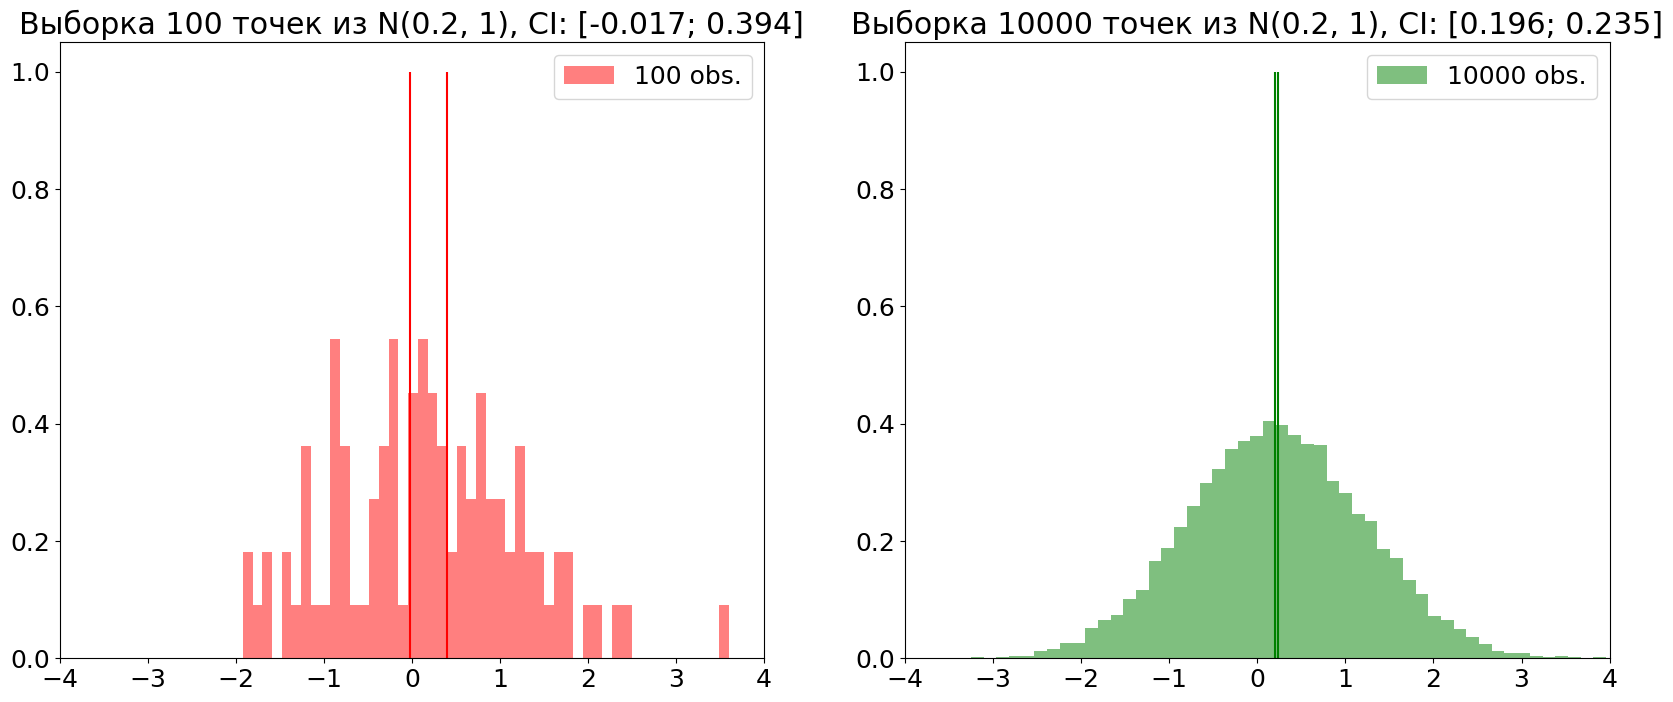

CPU times: total: 281 ms
Wall time: 293 ms


In [3]:
%%time

np.random.seed(42)

plt.rcParams.update({'font.size': 18})
size = 100_000
size1 = 100
size2 = 10_000
alpha = 0.05
z = abs(norm.ppf(1 - alpha / 2))

mean = 0.2
std = 1
a = np.random.normal(mean, std, size)

# sample 1 from unknown distribution
a1 = np.random.choice(a, size=size1, replace=False)
mean1 = np.mean(a1)
std1 = np.std(a1)

# sample 2 from unknown distribution
a2 = np.random.choice(a, size=size2, replace=False)
mean2 = np.mean(a2)
std2 = np.std(a2)

# margine of error
MOE1 = np.round(z * std1 / np.sqrt(size1), 4)
MOE2 = np.round(z * std2 / np.sqrt(size2), 4)

print(f'MOE1 = {MOE1}')
print(f'MOE2 = {MOE2}\n')

ci_left1, ci_right1 = round(mean1 - MOE1, 3), round(mean1 + MOE1, 3)
ci_left2, ci_right2 = round(mean2 - MOE2, 3), round(mean2 + MOE2, 3)

# уже по ширине и границам доверительных интервалов можем увидеть, что меньшая выборка склонна не отвергать нулевую гипотезу,
# т.к. содержит 0 в доверительном интервале
print(f'Conf.interval, {size1} obs: (', ci_left1, ci_right1, ')')
print(f'Conf.interval, {size2} obs: (', ci_left2, ci_right2, ')')

print(f'\nSample size = {size1}, stdev = {std1:.3f}, E1 = {MOE1}, confint_width = {np.round(2 * MOE1, 2)}')
print(f'Sample size = {size2}, stdev = {std2:.3f}, E1 = {MOE2}, confint_width = {np.round(2 * MOE2, 2)}\n')

density = True
lim = 4
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.hist(a1, alpha=0.5, bins=50, color='Red', label=f'{size1} obs.', density=density)
ax1.vlines([ci_left1, ci_right1], 0, 1, color='Red')
ax1.set_title(f'Выборка {size1} точек из N({mean}, {std}), CI: [{ci_left1}; {ci_right1}]')
ax1.set_xlim([-lim, lim])
ax2.hist(a2, alpha=0.5, bins=50, color='Green', label=f'{size2} obs.', density=density)
ax2.vlines([ci_left2, ci_right2], 0, 1, color='Green')
ax2.set_title(f'Выборка {size2} точек из N({mean}, {std}), CI: [{ci_left2}; {ci_right2}]')
ax2.set_xlim([-lim, lim])
ax1.legend()
ax2.legend()
plt.show()